In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [2]:
%matplotlib inline

## 讀取檔案

In [3]:
movies_df = pd.read_csv('movies_data_20191030_v3.csv')

In [4]:
movies_df['tmdb_id'] = movies_df['tmdb_id'].astype('int')
movies_df['Total_gross'] = movies_df['Total_gross'].astype('float64')
movies_df['Release_date'] = movies_df['Release_date'].astype('datetime64')
movies_df['release_in_holidayweek'] = movies_df['release_in_holidayweek'].astype('int')
movies_df['homepage'] = movies_df['homepage'].astype('int')
movies_df['have_comments'] = movies_df['have_comments'].astype('int32')

In [5]:
movies_df['adj_total_gross'] = movies_df['Total_gross'] / movies_df['gdp_deflator']

In [6]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6296 entries, 0 to 6295
Data columns (total 75 columns):
tmdb_id                           6296 non-null int32
mojo_title                        6296 non-null object
original_title                    6296 non-null object
tagline                           3619 non-null object
collection_id                     668 non-null float64
budget                            2401 non-null float64
Total_gross                       6296 non-null float64
comments_total_qty                6296 non-null float64
sc_negative                       6296 non-null float64
sc_neutral                        6296 non-null float64
sc_positive                       6296 non-null float64
total_sentiment_level             6296 non-null object
holidayweek                       1019 non-null object
Release_date                      6296 non-null datetime64[ns]
Release_year                      6296 non-null int64
Release_month                     6296 non-null int64
Re

#### 用首週票房金額分四類

In [ ]:
def get_gross_level4(value):
    if value >= 40000000:
        return 1
    elif value >= 10000000 and value < 40000000:
        return 2
    elif value >= 1000000 and value < 10000000:
        return 3
    else:
        return 4

In [ ]:
movies_df['week_boxoffice_level(4)'] = movies_df['First_week_gross'].apply(lambda x: get_gross_level4(x))

#### 人工篩選mojo重新上映老電影造成的資料錯誤

* Ghosts of the Abyss/ Titanic 3D → index=1586
* Titanic: 20 Years Later with James Cameron / Titanic (20th Anniversary) → index=4881
* Star Wars: Episode I - The Phantom Menace  → index=1608
* Jurassic Park / Jurassic Park 3D → index=2186
* Once Upon a Deadpool → index=5403

In [ ]:
movies_df.sort_values(by='Total_gross', ascending=False).head(20)

In [ ]:
movies_df[movies_df['tmdb_id']==567604.0]

In [ ]:
selected_index = [1608, 1586, 4881, 2186, 5403]

In [ ]:
movies_df.drop(index=selected_index, inplace=True)

In [ ]:
movies_df.shape

#### 清洗Holiday name

In [ ]:
def clean_holiday_name(x):
    if 'Christmas' in x:
        return 'Christmas'
    elif 'Independence' in x:
        return 'Independence'
    elif 'Year' in x:
        return 'New Year'
    elif 'Veterans' in x:
        return 'Veterans Day'
    else:
        return x

In [ ]:
movies_df['holidayweek'] = movies_df['holidayweek'].apply(lambda x: x if isinstance(x,float) else clean_holiday_name(x))

In [ ]:
movies_df.info()

In [ ]:
# movies_df.to_csv('movies_data_20191030_Angela.csv', encoding='utf-8', index=False)

#### check Guardians of Galaxy2 cast names

In [ ]:
castlist = pd.read_csv('D:/Movie/TMDB_movie/actor_list.csv')

In [ ]:
movies_df[movies_df['tmdb_id'] == 283995]['top3_cast']

In [ ]:
castlist[castlist['id']==73457]['name']

In [ ]:
castlist[castlist['id']==8691]['name']

In [ ]:
castlist[castlist['id']==543530]['name']

## Box Office

### 總票房排行榜

#### 依總票房金額

In [7]:
movies_df.sort_values(by='Total_gross', ascending=False)[['tmdb_id','mojo_title','Release_date','Release_year','Total_gross']].head(20)

,tmdb_id,mojo_title,Release_date,Release_year,Total_gross
3327,140607,Star Wars: The Force Awakens,2015-12-18,2015,936662225.0
5860,299534,Avengers: Endgame,2019-04-26,2019,858373000.0
0,19995,Avatar,2009-12-18,2009,760507625.0
5205,284054,Black Panther,2018-02-16,2018,700059566.0
5206,299536,Avengers: Infinity War,2018-04-27,2018,678815482.0
3328,135397,Jurassic World,2015-06-12,2015,652270625.0
1522,24428,Marvel's The Avengers,2012-05-04,2012,623357910.0
4591,181808,Star Wars: The Last Jedi,2017-12-15,2017,620181382.0
5207,260513,Incredibles 2,2018-06-15,2018,608581744.0
5861,420818,The Lion King (2019),2019-07-19,2019,538276520.0


#### 依調整後總票房金額

In [8]:
temp = movies_df.sort_values(by='adj_total_gross', ascending=False)[['tmdb_id','mojo_title','Release_date','Release_year','adj_total_gross']]
temp['adj_total_gross(M)'] = temp['adj_total_gross']/1000000
temp.head(10)

,tmdb_id,mojo_title,Release_date,Release_year,adj_total_gross,adj_total_gross(M)
0,19995,Avatar,2009-12-18,2009,9.975833e+08,997.583312
3327,140607,Star Wars: The Force Awakens,2015-12-18,2015,8.759242e+08,875.924189
3328,135397,Jurassic World,2015-06-12,2015,6.099740e+08,609.974015
1,8373,Transformers: Revenge of the Fallen,2009-06-24,2009,5.274636e+08,527.463602
3955,330459,Rogue One: A Star Wars Story,2016-12-16,2016,4.866620e+08,486.662049
3956,127380,Finding Dory,2016-06-17,2016,4.447044e+08,444.704394
3329,99861,Avengers: Age of Ultron,2015-05-01,2015,4.292415e+08,429.241547
2,767,Harry Potter and the Half-Blood Prince,2009-07-15,2009,3.962606e+08,396.260619
3,18239,The Twilight Saga: New Moon,2009-11-20,2009,3.890912e+08,389.091151
4,14160,Up,2009-05-29,2009,3.843434e+08,384.343371


In [9]:
movies_df.groupby('Release_year')['gdp_deflator'].max()

Release_year
2009    0.762350
2010    1.165251
2011    2.088904
2012    1.917849
2013    1.754916
2014    1.891891
2015    1.069342
2016    1.093525
2017    1.900778
2018    2.255302
2019    2.255302
Name: gdp_deflator, dtype: float64

In [10]:
temp = movies_df.groupby('Release_year')['adj_total_gross'].sum()
temp

Release_year
2009    1.419382e+10
2010    8.649110e+09
2011    4.745645e+09
2012    5.492214e+09
2013    6.166410e+09
2014    5.500201e+09
2015    1.031301e+10
2016    1.025382e+10
2017    5.723039e+09
2018    5.061055e+09
2019    3.125214e+09
Name: adj_total_gross, dtype: float64

In [11]:
%matplotlib inline

from matplotlib.ticker import FuncFormatter
def billions(x, pos):
    'The two args are the value and tick position'
    return '$%1.0fB' % (x*1e-9)
formatter = FuncFormatter(billions)

[Text(0, 0.5, 'Adjusted Amount (USD)'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Yearly Sum of Movie Box Office Amount (adjusted)')]

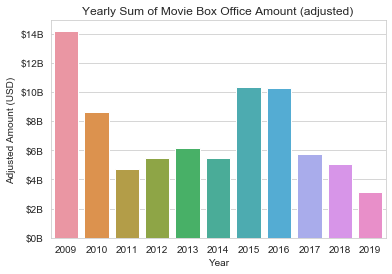

In [12]:
sns.set_style("whitegrid")
g = sns.barplot(x=temp.index, y=temp)
g.yaxis.set_major_formatter(formatter)
g.set(xlabel='Year', ylabel='Adjusted Amount (USD)',
      title='Yearly Sum of Movie Box Office Amount (adjusted)')

In [13]:
# boxoffice_rank.to_csv('BoxOffice_ranking_20191030.csv', encoding='utf-8', index=False)

### 票房分布

去除2019年，因為總票房尚未完全結算(5860部電影)
* 平均總票房金額為1827萬美元，75%的總票房金額少於577萬美元
* 平均首週票房金額為683萬美元，75%的總票房金額少於88萬美元
* 首週票房金額平均約佔總票房的40.79%

In [14]:
boxoffice_df = movies_df.loc[movies_df['Release_year'] < 2019,:]

In [15]:
boxoffice_df.shape

(5860, 75)

In [16]:
boxoffice_df['Total_gross'].describe()/10000

count        0.586000
mean      1827.750191
std       5506.506645
min          0.007200
25%          2.937175
50%         21.248950
75%        577.910700
max      93666.222500
Name: Total_gross, dtype: float64

In [17]:
boxoffice_df['First_week_gross'].describe()/10000

count        0.586000
mean       683.981240
std       2296.342253
min          0.001100
25%          0.817475
50%          4.367250
75%         88.860600
max      39085.605400
Name: First_week_gross, dtype: float64

In [18]:
(boxoffice_df['First_week_gross'] / boxoffice_df['Total_gross']).mean()

0.4079050191025874

In [19]:
%matplotlib inline

from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.0fM' % (x*1e-6)
formatter = FuncFormatter(millions)

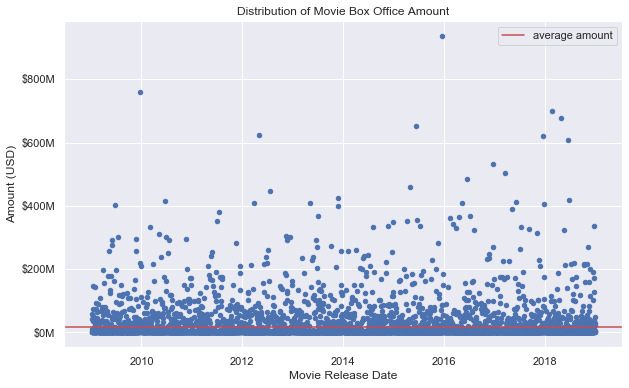

In [21]:
sns.set()
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
ax.scatter(x=boxoffice_df['Release_date'], y=boxoffice_df['Total_gross'], s=20)
ax.axhline(boxoffice_df['Total_gross'].mean(), color='r', label='average amount')
ax.yaxis.set_major_formatter(formatter)
ax.set(xlabel='Movie Release Date', ylabel='Amount (USD)',
       title='Distribution of Movie Box Office Amount')
ax.legend()

#### 總票房與首週票房

In [22]:
temp = boxoffice_df.groupby('Release_year')['First_week_gross','Total_gross'].mean().reset_index()
temp['first_wk_pc'] = temp['First_week_gross'] / temp['Total_gross']
temp

,Release_year,First_week_gross,Total_gross,first_wk_pc
0,2009,7.636614e+06,2.231064e+07,0.342286
1,2010,7.413569e+06,2.052623e+07,0.361175
2,2011,6.594884e+06,1.815604e+07,0.363234
3,2012,6.844920e+06,1.831867e+07,0.373658
4,2013,6.036024e+06,1.794615e+07,0.336341
5,2014,6.175240e+06,1.659614e+07,0.372089
6,2015,7.160411e+06,1.756072e+07,0.407751
7,2016,7.136808e+06,1.763020e+07,0.404806
8,2017,6.992094e+06,1.771698e+07,0.394655
9,2018,6.657028e+06,1.742627e+07,0.382011


In [23]:
%matplotlib inline

from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.0fM' % (x*1e-6)
formatter = FuncFormatter(millions)
g_text = ['{:,.0%}'.format(line) for line in temp['first_wk_pc']]
g_text

['34%', '36%', '36%', '37%', '34%', '37%', '41%', '40%', '39%', '38%']

[Text(0, 0.5, 'Amount (USD)'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Average of Movie Box Office Amount')]

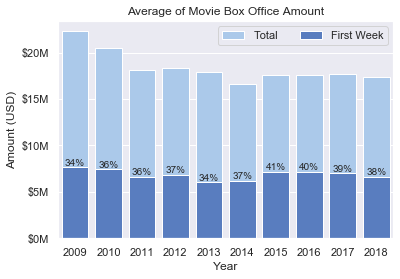

In [24]:
fig, ax = plt.subplots()
sns.set_color_codes("pastel")
sns.barplot(x=temp['Release_year'], y=temp['Total_gross'], label="Total", color="b")
sns.set_color_codes("muted")
sns.barplot(x=temp['Release_year'], y=temp['First_week_gross'], label="First Week", color="b")
for line in range(0,temp.shape[0]):
    ax.text(x=line, y=temp['First_week_gross'][line],
           s=g_text[line], ha='center', va='bottom', fontsize='10')
ax.yaxis.set_major_formatter(formatter)
ax.legend(ncol=2)
ax.set(xlabel="Year", ylabel="Amount (USD)",
       title="Average of Movie Box Office Amount")

### 電影數量與票房

* 10年平均每年上映586部電影，電影數量相較2009年，2018年的電影總數增加35%
* 高於平均總票房金額數量每年約有110部電影，佔18.42%

In [25]:
movies_qty = pd.DataFrame(boxoffice_df.groupby('Release_year')['tmdb_id'].count())
movies_qty.rename(columns={'tmdb_id':'qty'}, inplace=True)
movies_qty['qty_rate'] = (movies_qty['qty'] - movies_qty['qty'].shift(1)) / movies_qty['qty']

In [26]:
movies_qty['above_mean_qty'] = boxoffice_df[boxoffice_df['Total_gross'] >= boxoffice_df['Total_gross'].mean()].groupby('Release_year')['tmdb_id'].count()
movies_qty['above_mean_qty(pc)'] = movies_qty['above_mean_qty'] / movies_qty['qty']

In [27]:
movies_qty['mean_gross(million)'] = boxoffice_df.groupby('Release_year')['Total_gross'].mean()/1000000
movies_qty['sum_gross(billion)'] = boxoffice_df.groupby('Release_year')['Total_gross'].sum()/1000000000

In [28]:
movies_qty

,qty,qty_rate,above_mean_qty,above_mean_qty(pc),mean_gross(million),sum_gross(billion)
Release_year,,,,,,
2009,485,NaN,113,0.232990,22.310637,10.820659
2010,491,0.012220,118,0.240326,20.526234,10.078381
2011,546,0.100733,120,0.219780,18.156035,9.913195
2012,575,0.050435,106,0.184348,18.318673,10.533237
2013,603,0.046434,113,0.187396,17.946152,10.821529
2014,627,0.038278,109,0.173844,16.596144,10.405782
2015,628,0.001592,102,0.162420,17.560723,11.028134
2016,636,0.012579,111,0.174528,17.630204,11.212810
2017,614,-0.035831,104,0.169381,17.716978,10.878224


In [29]:
movies_qty['qty'].mean()

586.0

In [30]:
movies_qty.describe()

,qty,qty_rate,above_mean_qty,above_mean_qty(pc),mean_gross(million),sum_gross(billion)
count,10.000000,9.000000,10.000000,10.000000,10.000000,10.000000
mean,586.000000,0.032115,109.700000,0.189921,18.418805,10.710616
std,60.301096,0.039594,6.498718,0.030321,1.701243,0.478487
min,485.000000,-0.035831,101.000000,0.154198,16.596144,9.913195
25%,553.250000,0.012220,104.500000,0.170497,17.578093,10.437646
50%,608.500000,0.038278,110.000000,0.179438,17.831565,10.821094
75%,627.750000,0.050435,113.000000,0.211684,18.278014,10.990657
max,655.000000,0.100733,120.000000,0.240326,22.310637,11.414209


In [31]:
(movies_qty.at[2018, 'qty'] - movies_qty.at[2009, 'qty']) / movies_qty.at[2009, 'qty']

0.35051546391752575

In [32]:
movies_qty.reset_index(inplace=True)

In [33]:
%matplotlib inline
sns.set()

In [34]:
qty_text = ['{:,.0%}'.format(line) for line in movies_qty['above_mean_qty(pc)']]
qty_text

['23%', '24%', '22%', '18%', '19%', '17%', '16%', '17%', '17%', '15%']

[(0, 750),
 Text(0, 0.5, 'Quantity'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Yearly Movie Released Quantity')]

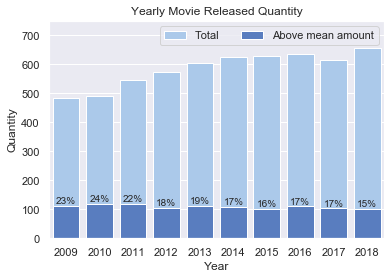

In [35]:
fig, ax = plt.subplots()
sns.set_color_codes("pastel")
sns.barplot(x=movies_qty['Release_year'], y=movies_qty['qty'], label="Total", color="b")
sns.set_color_codes("muted")
sns.barplot(x=movies_qty['Release_year'], y=movies_qty['above_mean_qty'], label="Above mean amount", color="b")
for line in range(0,movies_qty.shape[0]):
    ax.text(x=line, y=movies_qty['above_mean_qty'][line],
           s=qty_text[line], ha='center', va='bottom', fontsize='10')
ax.legend(ncol=2)
ax.set(ylim=(0,750), 
       xlabel="Year", ylabel="Quantity",
       title="Yearly Movie Released Quantity")

### 利潤

* 平均預估成本約:3685萬美元，最大值為5億美元
* 平均獲利金額約:989萬美元，最大值為6.9億美元
* 樣本有2426部電影，有獲利(>0)的電影數量為989部, 比例約40.77%

In [36]:
budget_movies = movies_df[movies_df['budget'].notnull()]

In [37]:
budget_movies.head()

,tmdb_id,mojo_title,original_title,tagline,collection_id,budget,Total_gross,comments_total_qty,sc_negative,sc_neutral,...,gdp_deflator,unemployment_rate,gdp_annual_rate,First_week_gross,adj_first_week_gross,boxoffice_level,week_boxoffice_level,boxoffice_level(4),week_boxoffice_level(4),adj_total_gross
0,19995,Avatar,Avatar,Enter the World of Pandora.,87096.0,237000000.0,760507625.0,0.0,0.0,0.0,...,0.76235,9.2542,-2.536757,137094001,1.798308e+08,1,1,1,1,9.975833e+08
1,8373,Transformers: Revenge of the Fallen,Transformers: Revenge of the Fallen,Revenge is coming.,8650.0,150000000.0,402111870.0,0.0,0.0,0.0,...,0.76235,9.2542,-2.536757,91110948,1.195133e+08,1,1,1,1,5.274636e+08
2,767,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince,Dark Secrets Revealed,1241.0,250000000.0,302089278.0,0.0,0.0,0.0,...,0.76235,9.2542,-2.536757,80186627,1.051835e+08,1,1,1,1,3.962606e+08
3,18239,The Twilight Saga: New Moon,The Twilight Saga: New Moon,The Next Chapter Begins.,33514.0,50000000.0,296623634.0,0.0,0.0,0.0,...,0.76235,9.2542,-2.536757,188077665,2.467078e+08,1,1,1,1,3.890912e+08
4,14160,Up,Up,NaN,NaN,175000000.0,293004164.0,0.0,0.0,0.0,...,0.76235,9.2542,-2.536757,93072435,1.220862e+08,1,1,1,1,3.843434e+08


In [38]:
budget_movies['budget'].describe()/10000

count        0.240100
mean      3692.976798
std       5065.572337
min          0.000100
25%        600.000000
50%       1700.000000
75%       4200.000000
max      50000.000000
Name: budget, dtype: float64

In [39]:
budget_movies['profit'] = budget_movies['Total_gross'] - budget_movies['budget']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
budget_movies.sort_values(by='profit', ascending=False, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
budget_movies['profit'].describe()/10000

count        0.240100
mean       851.911505
std       5744.882062
min     -27097.570500
25%      -1105.237600
50%       -197.709900
75%       1375.437100
max      69166.222500
Name: profit, dtype: float64

In [42]:
budget_movies[budget_movies['profit'] > 0].shape[0], budget_movies['tmdb_id'].shape[0]

(971, 2401)

In [43]:
budget_movies[budget_movies['profit'] > 0].shape[0] / budget_movies.shape[0]

0.40441482715535193

In [44]:
BoxOffice_profit_ranking = budget_movies[['tmdb_id','mojo_title','Release_date','Release_year','Total_gross','budget','profit']].head(20)
BoxOffice_profit_ranking

,tmdb_id,mojo_title,Release_date,Release_year,Total_gross,budget,profit
3327,140607,Star Wars: The Force Awakens,2015-12-18,2015,936662225.0,245000000.0,691662225.0
0,19995,Avatar,2009-12-18,2009,760507625.0,237000000.0,523507625.0
5860,299534,Avengers: Endgame,2019-04-26,2019,858373000.0,356000000.0,502373000.0
3328,135397,Jurassic World,2015-06-12,2015,652270625.0,150000000.0,502270625.0
5205,284054,Black Panther,2018-02-16,2018,700059566.0,200000000.0,500059566.0
4591,181808,Star Wars: The Last Jedi,2017-12-15,2017,620181382.0,200000000.0,420181382.0
5207,260513,Incredibles 2,2018-06-15,2018,608581744.0,200000000.0,408581744.0
1522,24428,Marvel's The Avengers,2012-05-04,2012,623357910.0,220000000.0,403357910.0
5206,299536,Avengers: Infinity War,2018-04-27,2018,678815482.0,300000000.0,378815482.0
4592,321612,Beauty and the Beast (2017),2017-03-17,2017,504014165.0,160000000.0,344014165.0


In [ ]:
# BoxOffice_profit_ranking.to_csv('BoxOffice_profit_ranking_20191030.csv', encoding='utf-8', index=False)

### 各價格區間的金額比例

#### 首週票房總和

In [45]:
temp = movies_df.pivot_table(index='Release_year', columns='week_boxoffice_level(4)', values='First_week_gross', aggfunc='sum')
temp

week_boxoffice_level(4),1,2,3,4
Release_year,,,,
2009,1999935252,1404696897,268169174,30956366
2010,1928676598,1513316924,170111487,27957465
2011,1860552955,1525107827,180370016,34776038
2012,2159566998,1514706695,228883834,32671402
2013,2072270650,1325369322,208374915,33707489
2014,2386520477,1216510179,230755674,38089365
2015,3091355996,1153175092,211683195,40523537
2016,2782666707,1433901447,280010942,42430742
2017,2935465730,1056903686,262634649,38141603


In [46]:
%matplotlib inline
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter

def billions(x, pos):
    'The two args are the value and tick position'
    return '$%1.0fB' % (x*1e-9)
formatter = FuncFormatter(billions)

g_text = ['{:,.0%}'.format(line) for line in (temp[1] / temp.sum(axis=1))]
g_text

['54%', '53%', '52%', '55%', '57%', '62%', '69%', '61%', '68%', '62%', '73%']

[None]

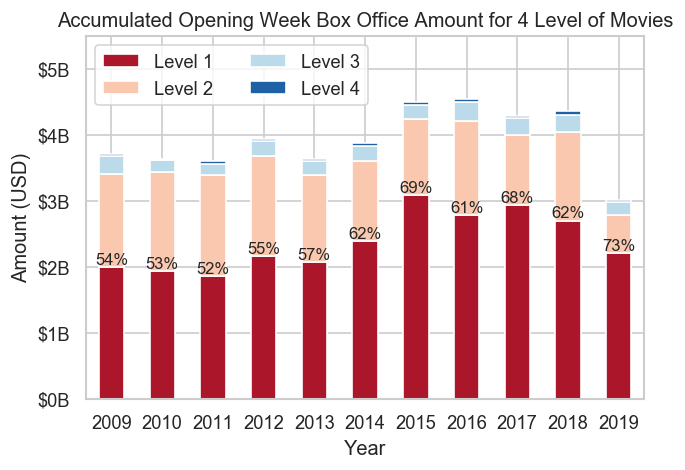

In [47]:
sns.set_style("whitegrid")
fig = plt.figure()
ax = plt.axes()
temp.plot(kind='bar', stacked=True, colormap=ListedColormap(sns.color_palette("RdBu", 10)), ax=ax)
ax.yaxis.set_major_formatter(formatter)
for line in range(0, temp.shape[0]):
    ax.text(x=line, y=temp[1].iloc[line],s=g_text[line], ha='center', va='bottom', fontsize='10')
ax.set(ylim=(0,5500000000))
ax.set(xlabel='Year', ylabel='Amount (USD)')
ax.set_title('Accumulated Opening Week Box Office Amount for 4 Level of Movies')
plt.xticks(rotation=0)
plt.legend(labels=['Level 1','Level 2','Level 3','Level 4'],loc='best',ncol=2)
fig.set(dpi=120)

#### 首週票房平均

In [48]:
temp = movies_df.pivot_table(index='Release_year', columns='week_boxoffice_level(4)', values='First_week_gross', aggfunc='mean')
temp

week_boxoffice_level(4),1,2,3,4
Release_year,,,,
2009,7.142626e+07,2.128329e+07,5.705727e+06,89989.436047
2010,7.714706e+07,2.073037e+07,4.597608e+06,78532.205056
2011,7.442212e+07,2.006721e+07,4.509250e+06,85866.760494
2012,9.389422e+07,2.330318e+07,4.487918e+06,74934.408257
2013,7.970272e+07,2.103761e+07,4.630554e+06,71870.978678
2014,7.698453e+07,2.061882e+07,4.615113e+06,78212.248460
2015,1.030452e+08,1.954534e+07,3.994023e+06,83381.763374
2016,9.938095e+07,2.206002e+07,4.179268e+06,89140.214286
2017,9.784886e+07,1.994158e+07,3.647703e+06,83097.174292


In [49]:
%matplotlib inline
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.0fM' % (x*1e-6)
formatter = FuncFormatter(millions)

g_text = ['{:,.0%}'.format(line) for line in (temp[1] / temp.sum(axis=1))]
g_text

['73%', '75%', '75%', '77%', '76%', '75%', '81%', '79%', '81%', '81%', '81%']

[None]

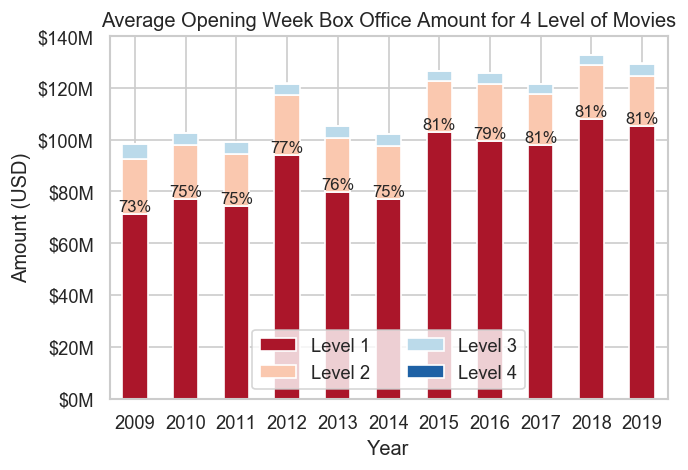

In [50]:
sns.set_style("whitegrid")
fig = plt.figure()
ax = plt.axes()
temp.plot(kind='bar', stacked=True, colormap=ListedColormap(sns.color_palette("RdBu", 10)), ax=ax)
ax.yaxis.set_major_formatter(formatter)
for line in range(0, temp.shape[0]):
    ax.text(x=line, y=temp[1].iloc[line],s=g_text[line], ha='center', va='bottom', fontsize='10')
ax.set(ylim=(0,140000000))
ax.set(xlabel='Year', ylabel='Amount (USD)')
ax.set_title('Average Opening Week Box Office Amount for 4 Level of Movies')
plt.xticks(rotation=0)
plt.legend(labels=['Level 1','Level 2','Level 3','Level 4'],loc='lower center',ncol=2)
fig.set(dpi=120)

#### 總票房總和

In [54]:
temp = movies_df.pivot_table(index='Release_year', columns='boxoffice_level(4)', values='Total_gross', aggfunc='sum')
temp

boxoffice_level(4),1,2,3,4
Release_year,,,,
2009,6.371535e+09,4.180017e+09,219842268.0,49264554.0
2010,5.368555e+09,4.435819e+09,225860632.0,48145953.0
2011,5.061763e+09,4.569626e+09,229367037.0,52438471.0
2012,6.159431e+09,4.084889e+09,238194099.0,50722787.0
2013,6.613924e+09,3.892350e+09,269999514.0,45256134.0
2014,6.064131e+09,4.051147e+09,232769610.0,57734870.0
2015,6.887591e+09,3.774389e+09,306516003.0,59637771.0
2016,6.605340e+09,4.222319e+09,331767992.0,53383760.0
2017,7.114925e+09,3.374528e+09,333400908.0,55369974.0


In [55]:
%matplotlib inline
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter

def billions(x, pos):
    'The two args are the value and tick position'
    return '$%1.0fB' % (x*1e-9)
formatter = FuncFormatter(billions)

g_text = ['{:,.0%}'.format(line) for line in (temp[1] / temp.sum(axis=1))]
g_text

['59%', '53%', '51%', '58%', '61%', '58%', '62%', '59%', '65%', '66%', '68%']

[None]

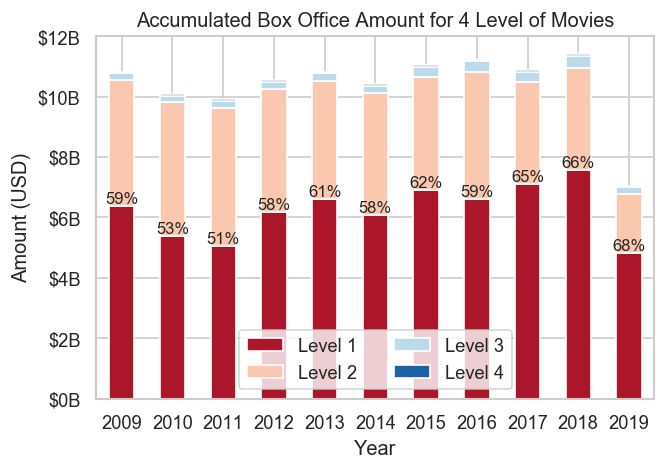

In [56]:
sns.set_style("whitegrid")
fig = plt.figure()
ax = plt.axes()
temp.plot(kind='bar', stacked=True, colormap=ListedColormap(sns.color_palette("RdBu", 10)), ax=ax)
ax.yaxis.set_major_formatter(formatter)
for line in range(0, temp.shape[0]):
    ax.text(x=line, y=temp[1].iloc[line],s=g_text[line], ha='center', va='bottom', fontsize='10')
ax.set(ylim=(0,12000000000))
ax.set(xlabel='Year', ylabel='Amount (USD)')
ax.set_title('Accumulated Box Office Amount for 4 Level of Movies')
plt.xticks(rotation=0)
plt.legend(labels=['Level 1','Level 2','Level 3','Level 4'], loc='best', ncol=2)
fig.set(dpi=120)

#### 總票房平均

In [57]:
temp = movies_df.pivot_table(index='Release_year', columns='boxoffice_level(4)', values='Total_gross', aggfunc='mean')
temp

boxoffice_level(4),1,2,3,4
Release_year,,,,
2009,1.991105e+08,3.800016e+07,4.071153e+06,170465.584775
2010,1.851226e+08,4.391900e+07,3.642913e+06,161023.254181
2011,1.745436e+08,4.154206e+07,3.276672e+06,155603.771513
2012,2.053144e+08,4.084889e+07,3.308251e+06,135986.024129
2013,1.889693e+08,4.140797e+07,3.333327e+06,115155.557252
2014,1.837615e+08,4.051147e+07,3.022982e+06,138452.925659
2015,2.375031e+08,3.891123e+07,3.260809e+06,146171.007353
2016,2.277703e+08,3.983319e+07,3.351192e+06,132795.422886
2017,2.223414e+08,3.667965e+07,3.236902e+06,143074.868217


In [58]:
%matplotlib inline
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.0fM' % (x*1e-6)
formatter = FuncFormatter(millions)

g_text = ['{:,.0%}'.format(line) for line in (temp[1] / temp.sum(axis=1))]
g_text

['82%', '80%', '80%', '82%', '81%', '81%', '85%', '84%', '85%', '85%', '85%']

[None]

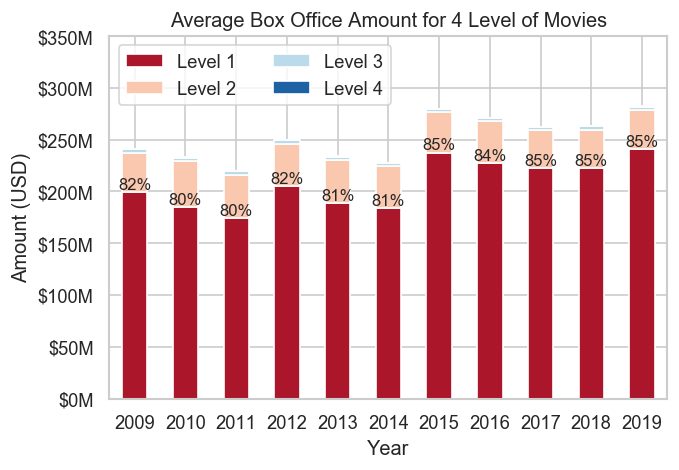

In [59]:
sns.set_style("whitegrid")
fig = plt.figure()
ax = plt.axes()
temp.plot(kind='bar', stacked=True, colormap=ListedColormap(sns.color_palette("RdBu", 10)), ax=ax)
ax.yaxis.set_major_formatter(formatter)
for line in range(0, temp.shape[0]):
    ax.text(x=line, y=temp[1].iloc[line],s=g_text[line], ha='center', va='bottom', fontsize='10')
ax.set(ylim=(0,350000000))
ax.set(xlabel='Year', ylabel='Amount (USD)')
ax.set_title('Average Box Office Amount for 4 Level of Movies')
plt.xticks(rotation=0)
plt.legend(labels=['Level 1','Level 2','Level 3','Level 4'], loc='upper left', ncol=2)
fig.set(dpi=120)

## 發行商

### 發行數量

* 10年共5860部電影，508個發行商
* 一個發行商平均約發行11.6部電影，一年約1部
* 75%的發行商平均每年發行低於0.6部電影，最多發行32部

In [60]:
boxoffice_df.shape

(5860, 75)

In [61]:
distributer_df = pd.DataFrame(boxoffice_df.groupby('distributor')['tmdb_id'].count()).reset_index()
distributer_df.rename(columns={'tmdb_id':'qty'}, inplace=True)
distributer_df['annual_qty'] = distributer_df['qty']/10
distributer_df.head()

,distributor,qty,annual_qty
0,108 Pics,1,0.1
1,21st Century Film Production,1,0.1
2,25th Frame,1,0.1
3,26 Aries,1,0.1
4,28 Entertainment,1,0.1


In [62]:
temp = pd.DataFrame(boxoffice_df.groupby('distributor')['Total_gross'].sum()).reset_index()
temp.head()

,distributor,Total_gross
0,108 Pics,35100.0
1,21st Century Film Production,50090.0
2,25th Frame,29495.0
3,26 Aries,9522.0
4,28 Entertainment,4254.0


In [63]:
distributer_df = pd.merge(distributer_df, temp, how='inner', on='distributor')
distributer_df.shape

(508, 4)

In [64]:
distributer_df.sort_values(by='qty', ascending=False, inplace=True)
distributer_df.head()

,distributor,qty,annual_qty,Total_gross
422,Sony,326,32.6,1.140301e+10
221,IFC,295,29.5,1.384976e+08
281,Magnolia,264,26.4,1.033499e+08
486,Warner Bros.,214,21.4,1.833386e+10
471,Universal,163,16.3,1.374414e+10


In [65]:
distributer_df['annual_qty'].describe()

count    508.000000
mean       1.153543
std        3.252765
min        0.100000
25%        0.100000
50%        0.100000
75%        0.600000
max       32.600000
Name: annual_qty, dtype: float64

Text(0.5, 1.0, 'Top 10 Distributors by Movie Quantity')

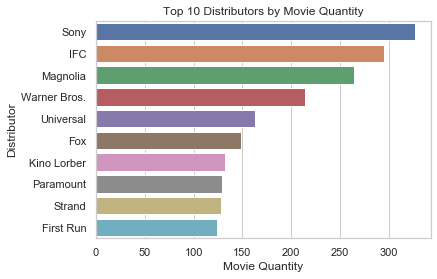

In [66]:
sns.barplot(x=distributer_df['qty'].head(10), y=distributer_df['distributor'].head(10))
plt.xlabel("Movie Quantity")
plt.ylabel("Distributor")
plt.title("Top 10 Distributors by Movie Quantity")

### 發行商票房金額 

* 10年共5915部電影，508個發行商
* 一個發行商平均一年票房收入約2150萬
* 75%的發行商平均一年票房收入低於25萬
* 發行商平均一年票房收入最大可達19.3億(wow)

In [67]:
distributer_df['annual_total_gross']= distributer_df['Total_gross']/10
distributer_df['mean_total_gross']= distributer_df['Total_gross']/distributer_df['qty']
distributer_df.head(10)

,distributor,qty,annual_qty,Total_gross,annual_total_gross,mean_total_gross
422,Sony,326,32.6,1.140301e+10,1.140301e+09,3.497856e+07
221,IFC,295,29.5,1.384976e+08,1.384976e+07,4.694834e+05
281,Magnolia,264,26.4,1.033499e+08,1.033499e+07,3.914769e+05
486,Warner Bros.,214,21.4,1.833386e+10,1.833386e+09,8.567225e+07
471,Universal,163,16.3,1.374414e+10,1.374414e+09,8.431987e+07
182,Fox,149,14.9,1.274406e+10,1.274406e+09,8.553060e+07
257,Kino Lorber,132,13.2,8.702453e+06,8.702453e+05,6.592767e+04
346,Paramount,129,12.9,1.076118e+10,1.076118e+09,8.341999e+07
427,Strand,128,12.8,6.702355e+06,6.702355e+05,5.236215e+04
171,First Run,124,12.4,4.628198e+06,4.628198e+05,3.732418e+04


In [68]:
distributer_df['annual_total_gross'].describe()/10000

count         0.050800
mean       2108.389000
std       16146.803077
min           0.004000
25%           0.336387
50%           1.987680
75%          25.147300
max      193677.157110
Name: annual_total_gross, dtype: float64

In [69]:
distributer_df.sort_values(by='Total_gross', ascending=False, inplace=True)

In [70]:
distributer_df.head(10)

,distributor,qty,annual_qty,Total_gross,annual_total_gross,mean_total_gross
87,Buena Vista,118,11.8,1.936772e+10,1.936772e+09,1.641332e+08
486,Warner Bros.,214,21.4,1.833386e+10,1.833386e+09,8.567225e+07
471,Universal,163,16.3,1.374414e+10,1.374414e+09,8.431987e+07
182,Fox,149,14.9,1.274406e+10,1.274406e+09,8.553060e+07
422,Sony,326,32.6,1.140301e+10,1.140301e+09,3.497856e+07
346,Paramount,129,12.9,1.076118e+10,1.076118e+09,8.341999e+07
269,Lionsgate,121,12.1,4.399228e+09,4.399228e+08,3.635726e+07
271,Lionsgate/Summit,41,4.1,2.078474e+09,2.078474e+08,5.069448e+07
490,Weinstein Company,82,8.2,1.698756e+09,1.698756e+08,2.071653e+07
434,Summit Entertainment,24,2.4,1.407705e+09,1.407705e+08,5.865436e+07


In [71]:
%matplotlib inline
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.0fM' % (x*1e-6)
formatter = FuncFormatter(millions)

Text(0.5, 1.0, 'Top 10 Distributors by Annual Box Office Amount')

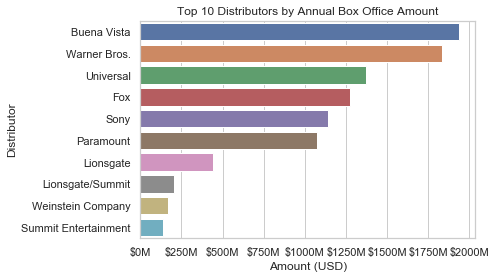

In [72]:
ax = sns.barplot(x=distributer_df['annual_total_gross'].head(10), y=distributer_df['distributor'].head(10))
ax.xaxis.set_major_formatter(formatter)
plt.xlabel("Amount (USD)")
plt.ylabel("Distributor")
plt.title("Top 10 Distributors by Annual Box Office Amount")

In [73]:
distributer_df.sort_values(by='mean_total_gross', ascending=False, inplace=True)

In [74]:
%matplotlib inline
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.0fM' % (x*1e-6)
formatter = FuncFormatter(millions)

Text(0.5, 1.0, 'Top 10 Distributors by Average Box Office Amount')

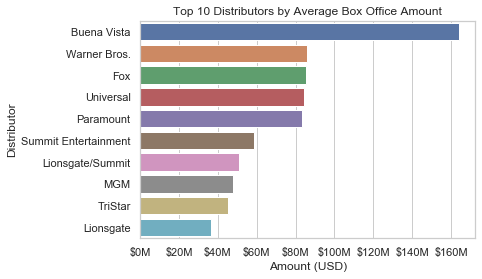

In [75]:
ax = sns.barplot(x=distributer_df['mean_total_gross'].head(10), y=distributer_df['distributor'].head(10))
ax.xaxis.set_major_formatter(formatter)
plt.xlabel("Amount (USD)")
plt.ylabel("Distributor")
plt.title("Top 10 Distributors by Average Box Office Amount")

In [76]:
boxoffice_df[boxoffice_df['distributor'] == 'Buena Vista'].sort_values(by='Total_gross',ascending=False).head(5)

,tmdb_id,mojo_title,original_title,tagline,collection_id,budget,Total_gross,comments_total_qty,sc_negative,sc_neutral,...,gdp_deflator,unemployment_rate,gdp_annual_rate,First_week_gross,adj_first_week_gross,boxoffice_level,week_boxoffice_level,boxoffice_level(4),week_boxoffice_level(4),adj_total_gross
3327,140607,Star Wars: The Force Awakens,Star Wars: The Force Awakens,Every generation has a story.,10.0,245000000.0,936662225.0,61350.0,14661.0,24321.0,...,1.069342,5.2800,2.880910,390856054,3.655109e+08,1,1,1,1,8.759242e+08
5205,284054,Black Panther,Black Panther,Long live the king.,529892.0,200000000.0,700059566.0,62219.0,11420.0,25660.0,...,2.255302,3.8956,2.856988,291954422,1.294525e+08,1,1,1,1,3.104061e+08
5206,299536,Avengers: Infinity War,Avengers: Infinity War,An entire universe. Once and for all.,86311.0,300000000.0,678815482.0,460566.0,85985.0,219028.0,...,2.255302,3.8956,2.856988,338332540,1.500165e+08,1,1,1,1,3.009865e+08
1522,24428,Marvel's The Avengers,The Avengers,Some assembly required.,86311.0,220000000.0,623357910.0,40182.0,9540.0,14643.0,...,1.917849,8.0694,2.249546,270019373,1.407928e+08,1,1,1,1,3.250297e+08
4591,181808,Star Wars: The Last Jedi,Star Wars: The Last Jedi,Darkness rises... and light to meet it,10.0,200000000.0,620181382.0,53297.0,12945.0,22416.0,...,1.900778,4.3552,2.217010,296602356,1.560426e+08,1,1,1,1,3.262777e+08


In [77]:
boxoffice_df[boxoffice_df['distributor'] == 'Warner Bros.'].sort_values(by='Total_gross',ascending=False).head(5)

,tmdb_id,mojo_title,original_title,tagline,collection_id,budget,Total_gross,comments_total_qty,sc_negative,sc_neutral,...,gdp_deflator,unemployment_rate,gdp_annual_rate,First_week_gross,adj_first_week_gross,boxoffice_level,week_boxoffice_level,boxoffice_level(4),week_boxoffice_level(4),adj_total_gross
1523,49026,The Dark Knight Rises,The Dark Knight Rises,The Legend Ends,263.0,250000000.0,448139099.0,67391.0,18065.0,18528.0,...,1.917849,8.0694,2.249546,225011359,1.173249e+08,1,1,1,1,2.336676e+08
4593,297762,Wonder Woman,Wonder Woman,Power. Grace. Wisdom. Wonder.,468552.0,149000000.0,412563408.0,51324.0,11221.0,15535.0,...,1.900778,4.3552,2.217010,147822503,7.776949e+07,1,1,1,1,2.170498e+08
976,12445,Harry Potter and the Deathly Hallows Part 2,Harry Potter and the Deathly Hallows: Part 2,It all ends here.,1241.0,125000000.0,381193157.0,45758.0,12224.0,15875.0,...,2.088904,8.9492,1.550836,226117069,1.082468e+08,1,1,1,1,1.824848e+08
2700,190859,American Sniper,American Sniper,The most lethal sniper in U.S. history.,NaN,58800000.0,350126372.0,3951.0,1843.0,726.0,...,1.891891,6.1675,2.451973,240211,1.269687e+05,1,3,1,4,1.850669e+08
5209,297802,Aquaman,Aquaman,Home Is Calling,573693.0,160000000.0,335061807.0,77153.0,12408.0,30094.0,...,2.255302,3.8956,2.856988,4700000,2.083978e+06,1,2,1,3,1.485663e+08


In [78]:
boxoffice_df[boxoffice_df['distributor'] == 'Universal'].sort_values(by='Total_gross',ascending=False).head(5)

,tmdb_id,mojo_title,original_title,tagline,collection_id,budget,Total_gross,comments_total_qty,sc_negative,sc_neutral,...,gdp_deflator,unemployment_rate,gdp_annual_rate,First_week_gross,adj_first_week_gross,boxoffice_level,week_boxoffice_level,boxoffice_level(4),week_boxoffice_level(4),adj_total_gross
3328,135397,Jurassic World,Jurassic World,The park is open.,328.0,150000000.0,652270625.0,39511.0,10143.0,12145.0,...,1.069342,5.2800,2.880910,296211625,2.770037e+08,1,1,1,1,6.099740e+08
5208,351286,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,The park is gone,328.0,170000000.0,417719760.0,47498.0,11675.0,20061.0,...,2.255302,3.8956,2.856988,204787335,9.080262e+07,1,1,1,1,1.852168e+08
3958,328111,The Secret Life of Pets,The Secret Life of Pets,Think this is what they do all day?,427084.0,75000000.0,368384330.0,6659.0,727.0,2760.0,...,1.093525,4.8692,1.567215,152587865,1.395376e+08,1,1,1,1,3.368777e+08
2100,93456,Despicable Me 2,Despicable Me 2,Back 2 Work,86066.0,76000000.0,368061265.0,3198.0,306.0,1517.0,...,1.754916,7.3749,1.842081,59557645,3.393761e+07,1,1,1,1,2.097316e+08
3331,168259,Furious 7,Furious 7,Vengeance Hits Home,9485.0,190000000.0,353007020.0,20787.0,5150.0,8638.0,...,1.069342,5.2800,2.880910,191930470,1.794847e+08,1,1,1,1,3.301162e+08


In [79]:
boxoffice_df[boxoffice_df['distributor'] == 'Fox'].sort_values(by='Total_gross',ascending=False).head(5)

,tmdb_id,mojo_title,original_title,tagline,collection_id,budget,Total_gross,comments_total_qty,sc_negative,sc_neutral,...,gdp_deflator,unemployment_rate,gdp_annual_rate,First_week_gross,adj_first_week_gross,boxoffice_level,week_boxoffice_level,boxoffice_level(4),week_boxoffice_level(4),adj_total_gross
0,19995,Avatar,Avatar,Enter the World of Pandora.,87096.0,237000000.0,760507625.0,0.0,0.0,0.0,...,0.762350,9.2542,-2.536757,137094001,1.798308e+08,1,1,1,1,9.975833e+08
3960,293660,Deadpool,Deadpool,Witness the beginning of a happy ending,448150.0,58000000.0,363070709.0,28439.0,3573.0,11883.0,...,1.093525,4.8692,1.567215,180394887,1.649663e+08,1,1,1,1,3.320185e+08
5210,383498,Deadpool 2,Deadpool 2,Prepare for the Second Coming.,448150.0,110000000.0,324591735.0,46668.0,7031.0,21977.0,...,2.255302,3.8956,2.856988,164707352,7.303117e+07,1,1,1,1,1.439238e+08
2708,127585,X-Men: Days of Future Past,X-Men: Days of Future Past,"To save the future, they must alter the past",748.0,250000000.0,233921534.0,34121.0,7102.0,11928.0,...,1.891891,6.1675,2.451973,129469103,6.843369e+07,1,1,1,1,1.236443e+08
3334,286217,The Martian,The Martian,Bring Him Home,NaN,108000000.0,228433663.0,3608.0,585.0,1301.0,...,1.069342,5.2800,2.880910,71710329,6.706026e+07,1,1,1,1,2.136208e+08


In [80]:
boxoffice_df[boxoffice_df['distributor'] == 'Sony'].sort_values(by='Total_gross',ascending=False).head(5)

,tmdb_id,mojo_title,original_title,tagline,collection_id,budget,Total_gross,comments_total_qty,sc_negative,sc_neutral,...,gdp_deflator,unemployment_rate,gdp_annual_rate,First_week_gross,adj_first_week_gross,boxoffice_level,week_boxoffice_level,boxoffice_level(4),week_boxoffice_level(4),adj_total_gross
4594,353486,Jumanji: Welcome to the Jungle,Jumanji: Welcome to the Jungle,The game has evolved.,495527.0,90000000.0,404564861.0,19304.0,5074.0,5933.0,...,1.900778,4.3552,2.217010,16605967,8.736407e+06,1,1,1,2,2.128418e+08
4596,315635,Spider-Man: Homecoming,Spider-Man: Homecoming,Homework can wait. The city can't.,531241.0,175000000.0,334201140.0,19628.0,3973.0,7500.0,...,1.900778,4.3552,2.217010,163070314,8.579137e+07,1,1,1,1,1.758234e+08
1525,37724,Skyfall,Skyfall,Think on your sins.,645.0,200000000.0,304360277.0,6377.0,1466.0,1938.0,...,1.917849,8.0694,2.249546,2200000,1.147118e+06,1,2,1,3,1.586988e+08
1528,1930,The Amazing Spider-Man,The Amazing Spider-Man,The untold story begins.,125574.0,215000000.0,262030663.0,17671.0,4811.0,4235.0,...,1.917849,8.0694,2.249546,75017570,3.911547e+07,1,1,1,1,1.366274e+08
5217,335983,Venom (2018),Venom,The world has enough Superheroes.,558216.0,116000000.0,213515506.0,152359.0,26484.0,70871.0,...,2.255302,3.8956,2.856988,107102151,4.748905e+07,1,1,1,1,9.467268e+07


In [81]:
boxoffice_df[boxoffice_df['distributor'] == 'Paramount'].sort_values(by='Total_gross',ascending=False).head(5)

,tmdb_id,mojo_title,original_title,tagline,collection_id,budget,Total_gross,comments_total_qty,sc_negative,sc_neutral,...,gdp_deflator,unemployment_rate,gdp_annual_rate,First_week_gross,adj_first_week_gross,boxoffice_level,week_boxoffice_level,boxoffice_level(4),week_boxoffice_level(4),adj_total_gross
1,8373,Transformers: Revenge of the Fallen,Transformers: Revenge of the Fallen,Revenge is coming.,8650.0,150000000.0,402111870.0,0.0,0.0,0.0,...,0.762350,9.2542,-2.536757,91110948,1.195133e+08,1,1,1,1,5.274636e+08
977,38356,Transformers: Dark of the Moon,Transformers: Dark of the Moon,The invasion we always feared. An enemy we nev...,8650.0,195000000.0,352390543.0,2302.0,721.0,763.0,...,2.088904,8.9492,1.550836,64765347,3.100447e+07,1,1,1,1,1.686964e+08
487,10138,Iron Man 2,Iron Man 2,"It's not the armor that makes the hero, but th...",131292.0,200000000.0,312433331.0,193.0,37.0,77.0,...,1.165251,9.6334,2.563767,159159871,1.365885e+08,1,1,1,1,2.681255e+08
6,13475,Star Trek,Star Trek,The future begins.,115575.0,150000000.0,257730019.0,0.0,0.0,0.0,...,0.762350,9.2542,-2.536757,4000000,5.246934e+06,1,2,1,3,3.380731e+08
2706,91314,Transformers: Age of Extinction,Transformers: Age of Extinction,This is not war. It's extinction.,8650.0,210000000.0,245439076.0,630.0,150.0,216.0,...,1.891891,6.1675,2.451973,138345769,7.312564e+07,1,1,1,1,1.297321e+08


## 電影類型

In [82]:
genre_list = pd.read_csv('D:/Movie/movie_genre_list_20191026.csv', index_col='id')

In [83]:
genre_list

,name
id,
12,Adventure
14,Fantasy
16,Animation
18,Drama
27,Horror
28,Action
35,Comedy
36,History
37,Western


### 電影類型組合

* 一部電影含1~3種類型約佔總數的90%, 共5732部電影
* 620種電影類型組合

In [84]:
num_genres = pd.DataFrame(movies_df.groupby('num_of_genres')['tmdb_id'].count())
num_genres.rename(columns={'tmdb_id':'Qty'}, inplace=True)
num_genres['Qty_percentage'] = num_genres['Qty'] / num_genres['Qty'].sum()

In [85]:
num_genres['Total_gross'] = movies_df.groupby('num_of_genres')['Total_gross'].sum()

In [86]:
num_genres

,Qty,Qty_percentage,Total_gross
num_of_genres,,,
1,2289,0.363564,1.211452e+10
2,1995,0.316868,2.287885e+10
3,1388,0.220457,4.609084e+10
4,465,0.073856,2.498669e+10
5,125,0.019854,6.711369e+09
6,30,0.004765,1.223057e+09
7,4,0.000635,1.491265e+08


In [87]:
num_genres['Qty_percentage'].head(3).sum(), num_genres['Qty'].head(3).sum()

(0.9008894536213468, 5672)

In [88]:
genres_tb = pd.DataFrame(boxoffice_df.groupby('genres')['tmdb_id'].count()).reset_index()
genres_tb.rename(columns={'tmdb_id':'Qty'}, inplace=True)

In [89]:
def get_genres_name(x):
    items = eval(x)
    namelist = ''
    for item in items:
        namelist = namelist + genre_list.at[item,'name'] + ','
    return namelist

In [90]:
genres_tb['genres_name'] = genres_tb['genres'].apply(lambda x: get_genres_name(x).rstrip(','))

In [91]:
genres_tb.sort_values(by='Qty', ascending=False, inplace=True)

In [92]:
genres_tb.shape

(615, 3)

In [93]:
genres_tb.head(10)

,genres,Qty,genres_name
614,[99],860,Documentary
461,[18],753,Drama
401,"[18, 35]",305,"Drama,Comedy"
567,[35],289,Comedy
309,"[18, 10749]",213,"Drama,Romance"
375,"[18, 35, 10749]",190,"Drama,Comedy,Romance"
545,"[35, 10749]",159,"Comedy,Romance"
442,"[18, 53]",110,"Drama,Thriller"
489,"[27, 53]",88,"Horror,Thriller"
608,"[99, 10402]",86,"Documentary,Music"


Text(0.5, 1.0, 'Top 10 Genres Package by Movie Quantity')

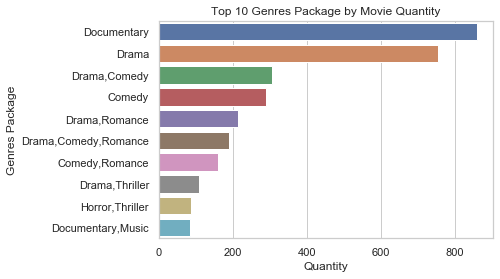

In [94]:
sns.barplot(x=genres_tb['Qty'].head(10), y=genres_tb['genres_name'].head(10))
plt.xlabel("Quantity")
plt.ylabel("Genres Package")
plt.title("Top 10 Genres Package by Movie Quantity")

#### 依總票房排行類型組合

In [95]:
temp = pd.DataFrame(boxoffice_df.groupby('genres')['Total_gross'].sum()).reset_index()
temp.rename(columns={'Total_gross':'sum_total'}, inplace=True)
temp.head()

,genres,sum_total
0,[10402],68719658.0
1,"[10749, 10751]",138545.0
2,[10749],80429035.0
3,[10751],1736246.0
4,[10752],176638.0


In [96]:
genres_tb = pd.merge(genres_tb, temp, how='inner', on='genres')
genres_tb.sort_values(by='sum_total', ascending=False, inplace=True)
genres_tb.head(10)

,genres,Qty,genres_name,sum_total
18,"[12, 28, 878]",42,"Adventure,Action,Science Fiction",9.322344e+09
3,[35],289,Comedy,5.775378e+09
57,"[12, 14, 28, 878]",14,"Adventure,Fantasy,Action,Science Fiction",4.527702e+09
22,"[12, 16, 35, 10751]",36,"Adventure,Animation,Comedy,Family",4.512241e+09
33,"[12, 14, 28]",26,"Adventure,Fantasy,Action",3.634351e+09
1,[18],753,Drama,3.614664e+09
44,"[12, 14, 10751]",18,"Adventure,Fantasy,Family",2.520000e+09
6,"[35, 10749]",159,"Comedy,Romance",2.354491e+09
13,"[28, 53, 80]",56,"Action,Thriller,Crime",2.124971e+09
56,"[16, 35, 10751]",15,"Animation,Comedy,Family",2.030296e+09


In [98]:
%matplotlib inline
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter

def billions(x, pos):
    'The two args are the value and tick position'
    return '$%1.0fM' % (x*1e-9)
formatter = FuncFormatter(billions)

Text(0.5, 1.0, 'Top 10 Genres Package by Box Office')

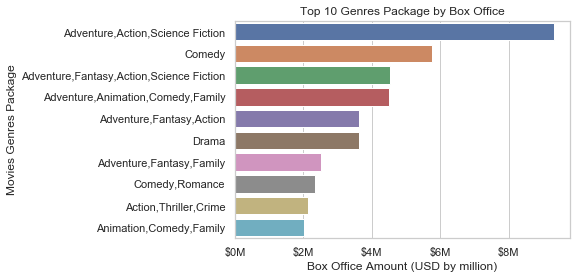

In [99]:
ax = sns.barplot(x=genres_tb['sum_total'].head(10), y=genres_tb['genres_name'].head(10))
ax.xaxis.set_major_formatter(formatter)
plt.xlabel("Box Office Amount (USD by million)")
plt.ylabel("Movies Genres Package")
plt.title("Top 10 Genres Package by Box Office")

#### 依首週票房排行類型組合

In [100]:
temp = pd.DataFrame(boxoffice_df.groupby('genres')['First_week_gross'].sum()).reset_index()
temp.rename(columns={'First_week_gross':'sum_week_gross'}, inplace=True)
temp.head()

,genres,sum_week_gross
0,[10402],17748773
1,"[10749, 10751]",92434
2,[10749],11261074
3,[10751],424438
4,[10752],115927


In [101]:
genres_tb = pd.merge(genres_tb, temp, how='inner', on='genres')
genres_tb.sort_values(by='sum_week_gross', ascending=False, inplace=True)
genres_tb.head(10)

,genres,Qty,genres_name,sum_total,sum_week_gross
0,"[12, 28, 878]",42,"Adventure,Action,Science Fiction",9.322344e+09,4052575487
1,[35],289,Comedy,5.775378e+09,2141277385
2,"[12, 14, 28, 878]",14,"Adventure,Fantasy,Action,Science Fiction",4.527702e+09,1785370587
3,"[12, 16, 35, 10751]",36,"Adventure,Animation,Comedy,Family",4.512241e+09,1569135755
4,"[12, 14, 28]",26,"Adventure,Fantasy,Action",3.634351e+09,1360356058
6,"[12, 14, 10751]",18,"Adventure,Fantasy,Family",2.520000e+09,1164094229
8,"[28, 53, 80]",56,"Action,Thriller,Crime",2.124971e+09,1056933107
7,"[35, 10749]",159,"Comedy,Romance",2.354491e+09,982979961
14,"[27, 53]",88,"Horror,Thriller",1.651572e+09,857730419
5,[18],753,Drama,3.614664e+09,812935276


In [102]:
%matplotlib inline
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.0fM' % (x*1e-6)
formatter = FuncFormatter(millions)

Text(0.5, 1.0, 'Top 10 Genres Package by Opening Week Box Office')

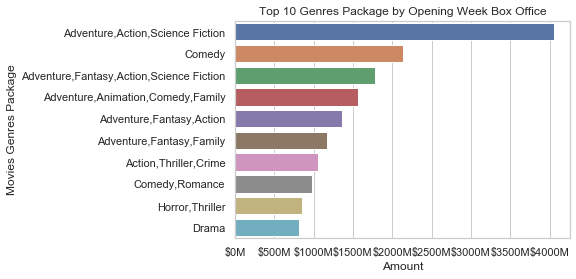

In [103]:
ax = sns.barplot(x=genres_tb['sum_week_gross'].head(10), y=genres_tb['genres_name'].head(10))
ax.xaxis.set_major_formatter(formatter)
plt.xlabel("Amount")
plt.ylabel("Movies Genres Package")
plt.title("Top 10 Genres Package by Opening Week Box Office")

### 單一類別

In [105]:
selected_cols = ['Total_gross', 'First_week_gross',
                 'Adventure', 'Fantasy', 'Animation', 'Drama', 'Horror', 'Action', 'Comedy',
                 'History', 'Thriller', 'Crime', 'Documentary', 'Science Fiction', 'Mystery','Romance',
                 'Family', 'genre_others']

In [106]:
genres_df = movies_df[selected_cols]

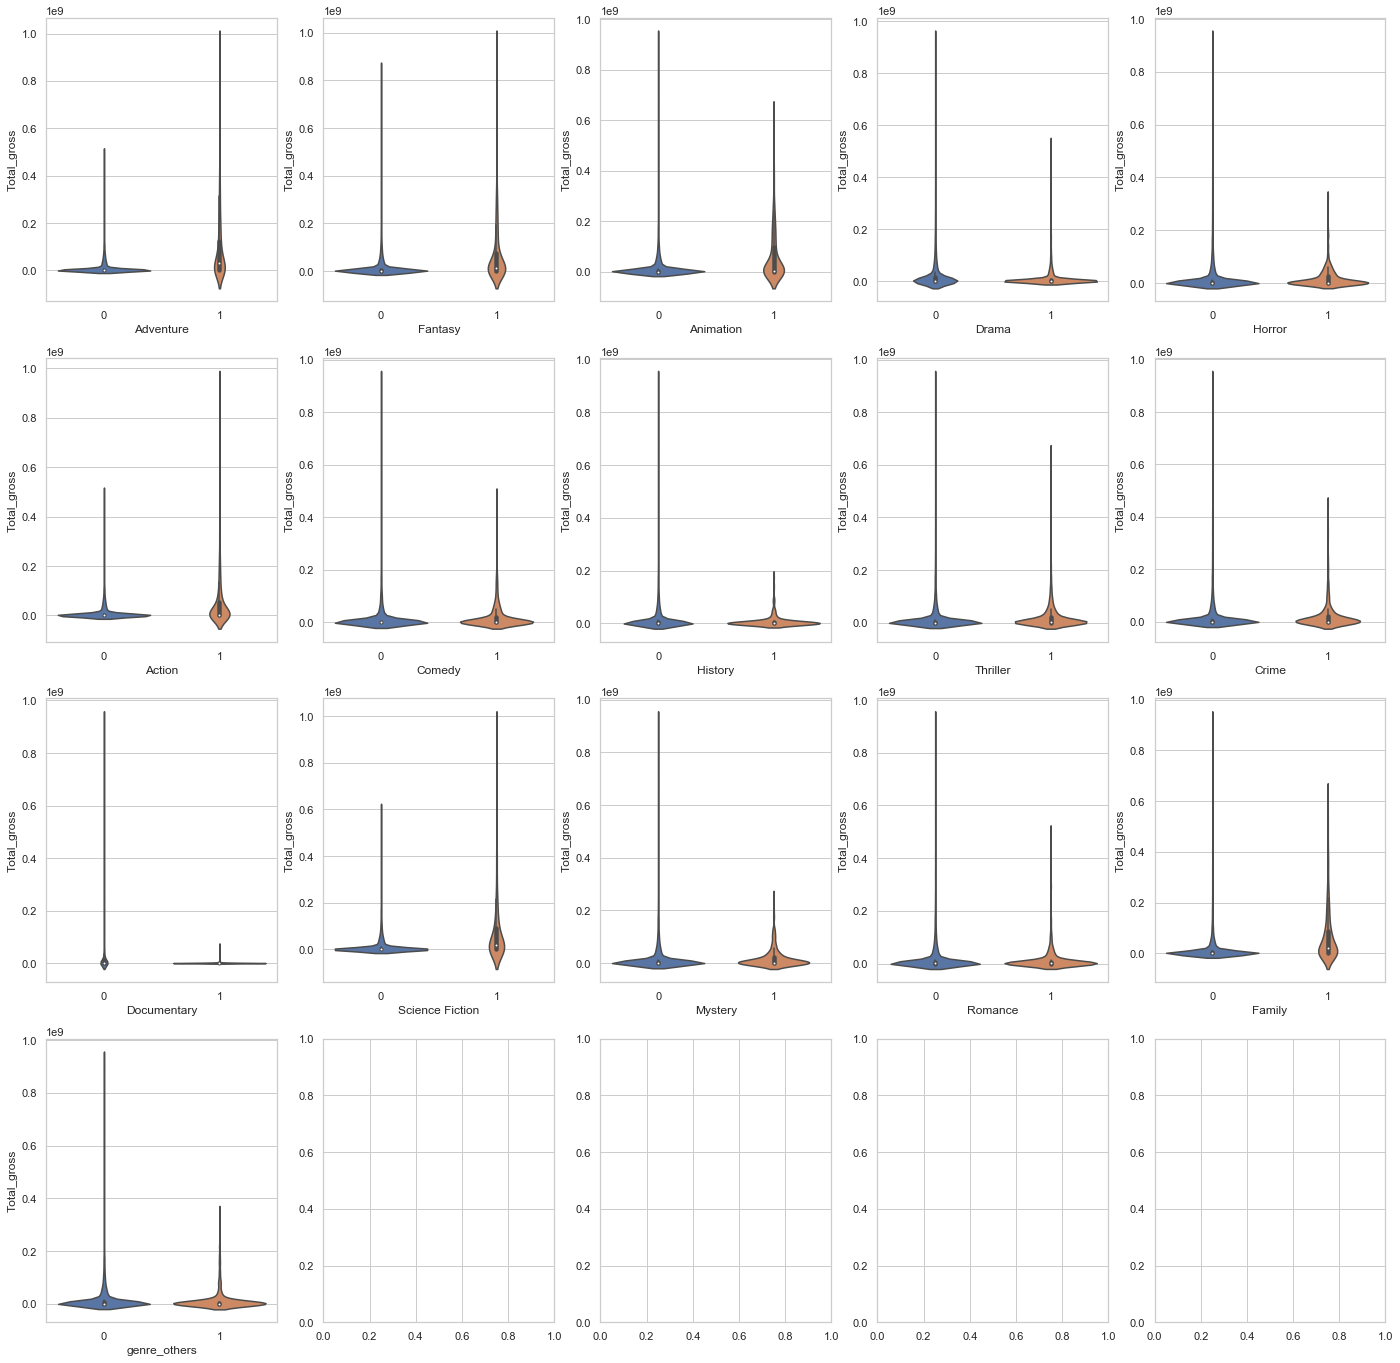

In [107]:
f, axes = plt.subplots(4, 5, figsize=(24, 24))
for i, e in enumerate([col for col in genres_df.columns if 'gross' not in col]):
    sns.violinplot(x=e ,y='Total_gross', data=genres_df, ax=axes[i // 5][i % 5])
plt.show()

In [108]:
genres_df.head()

,Total_gross,First_week_gross,Adventure,Fantasy,Animation,Drama,Horror,Action,Comedy,History,Thriller,Crime,Documentary,Science Fiction,Mystery,Romance,Family,genre_others
0,760507625.0,137094001,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,402111870.0,91110948,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,302089278.0,80186627,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,296623634.0,188077665,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,293004164.0,93072435,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [109]:
genres_df.groupby('Adventure')['Total_gross'].sum()

Adventure
0    6.412508e+10
1    5.002938e+10
Name: Total_gross, dtype: float64

In [110]:
genre_i, gross_sum, first_gross_sum = [], [], []
for i, e in enumerate([col for col in genres_df.columns if 'gross' not in col]):
    genre_i.append(e)
    gross_sum.append(genres_df.groupby(e)['Total_gross'].sum()[1])
    first_gross_sum.append(genres_df.groupby(e)['First_week_gross'].sum()[1])

In [111]:
temp = pd.DataFrame({'genre':genre_i, 'sum_of_total_gross':gross_sum, 'sum_of_1wk_gross':first_gross_sum})

In [112]:
genre_table = pd.DataFrame(genres_df.iloc[:,1:].sum().sort_values(ascending=False)).reset_index()
genre_table.rename(columns={'index':'genre', 0:'Qty'}, inplace=True)

In [113]:
genre_table = pd.merge(genre_table, temp, how='inner', on='genre')
genre_table

,genre,Qty,sum_of_total_gross,sum_of_1wk_gross
0,Drama,3061,3.182309e+10,10230100185
1,Comedy,1736,3.975344e+10,14108027960
2,Documentary,1264,1.163447e+09,220374218
3,Thriller,1078,2.164850e+10,9286279500
4,Action,947,4.901245e+10,20502374950
5,Romance,872,1.212300e+10,4505435300
6,Adventure,568,5.002938e+10,19967744011
7,Crime,556,1.124855e+10,4574606362
8,genre_others,507,6.494218e+09,1901987034
9,Horror,469,7.991106e+09,3973919858


Text(0.5, 1.0, 'Movie Genres by Quantity')

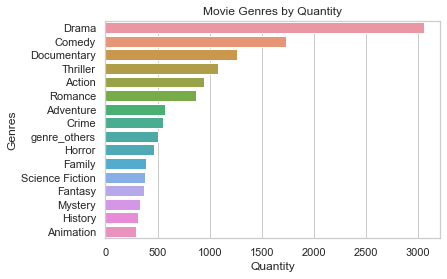

In [114]:
sns.barplot(x=(genre_table['Qty']), y=genre_table['genre'])
plt.xlabel("Quantity")
plt.ylabel("Genres")
plt.title("Movie Genres by Quantity")

In [115]:
genre_table.sort_values(by='sum_of_total_gross', ascending=False, inplace=True)
genre_table.head()

,genre,Qty,sum_of_total_gross,sum_of_1wk_gross
6,Adventure,568,5.002938e+10,19967744011
4,Action,947,4.901245e+10,20502374950
1,Comedy,1736,3.975344e+10,14108027960
0,Drama,3061,3.182309e+10,10230100185
11,Science Fiction,376,2.833629e+10,12151682286


Text(0.5, 1.0, 'Genres by Accumulated Box Office Amount')

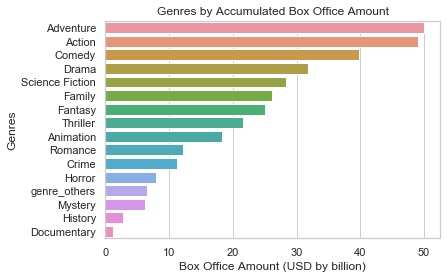

In [116]:
sns.barplot(x=(genre_table['sum_of_total_gross'])/1000000000, y=genre_table['genre'])
plt.xlabel("Box Office Amount (USD by billion)")
plt.ylabel("Genres")
plt.title("Genres by Accumulated Box Office Amount")

In [117]:
genre_table.sort_values(by='sum_of_1wk_gross', ascending=False, inplace=True)
genre_table.head()

,genre,Qty,sum_of_total_gross,sum_of_1wk_gross
4,Action,947,4.901245e+10,20502374950
6,Adventure,568,5.002938e+10,19967744011
1,Comedy,1736,3.975344e+10,14108027960
11,Science Fiction,376,2.833629e+10,12151682286
0,Drama,3061,3.182309e+10,10230100185


Text(0.5, 1.0, 'Genres by Accumulated Opening Week of Box Office Amount')

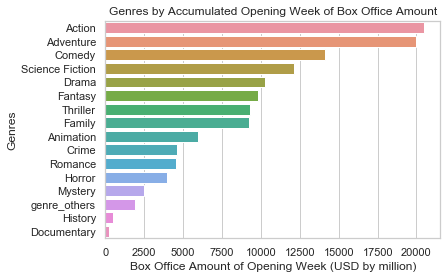

In [118]:
sns.barplot(x=(genre_table['sum_of_1wk_gross'])/1000000, y=genre_table['genre'])
plt.xlabel("Box Office Amount of Opening Week (USD by million)")
plt.ylabel("Genres")
plt.title("Genres by Accumulated Opening Week of Box Office Amount")

## 檔期

### 年份

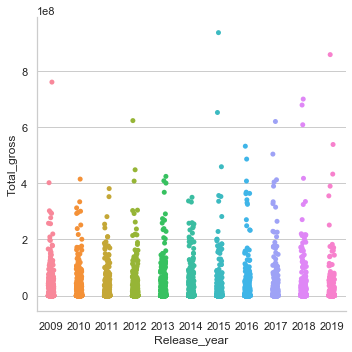

In [119]:
sns.catplot(x='Release_year', y='Total_gross', data=movies_df)

### 月份

In [120]:
movies_df.head()

,tmdb_id,mojo_title,original_title,tagline,collection_id,budget,Total_gross,comments_total_qty,sc_negative,sc_neutral,...,gdp_deflator,unemployment_rate,gdp_annual_rate,First_week_gross,adj_first_week_gross,boxoffice_level,week_boxoffice_level,boxoffice_level(4),week_boxoffice_level(4),adj_total_gross
0,19995,Avatar,Avatar,Enter the World of Pandora.,87096.0,237000000.0,760507625.0,0.0,0.0,0.0,...,0.76235,9.2542,-2.536757,137094001,1.798308e+08,1,1,1,1,9.975833e+08
1,8373,Transformers: Revenge of the Fallen,Transformers: Revenge of the Fallen,Revenge is coming.,8650.0,150000000.0,402111870.0,0.0,0.0,0.0,...,0.76235,9.2542,-2.536757,91110948,1.195133e+08,1,1,1,1,5.274636e+08
2,767,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince,Dark Secrets Revealed,1241.0,250000000.0,302089278.0,0.0,0.0,0.0,...,0.76235,9.2542,-2.536757,80186627,1.051835e+08,1,1,1,1,3.962606e+08
3,18239,The Twilight Saga: New Moon,The Twilight Saga: New Moon,The Next Chapter Begins.,33514.0,50000000.0,296623634.0,0.0,0.0,0.0,...,0.76235,9.2542,-2.536757,188077665,2.467078e+08,1,1,1,1,3.890912e+08
4,14160,Up,Up,NaN,NaN,175000000.0,293004164.0,0.0,0.0,0.0,...,0.76235,9.2542,-2.536757,93072435,1.220862e+08,1,1,1,1,3.843434e+08


Text(0.5, 1, 'Movie Box Office Dirstribution by Released Month')

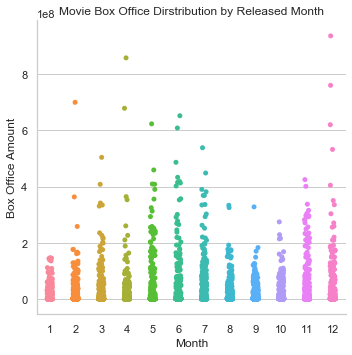

In [121]:
sns.catplot(x='Release_month', y='Total_gross', data=movies_df)
plt.xlabel("Month")
plt.ylabel("Box Office Amount")
plt.title("Movie Box Office Dirstribution by Released Month")

In [130]:
temp = movies_df.pivot_table(index='Release_month', values=['Total_gross','First_week_gross'], aggfunc='mean')
temp

,First_week_gross,Total_gross
Release_month,,
1,4.988889e+06,1.099124e+07
2,7.565717e+06,1.796813e+07
3,6.858917e+06,1.631838e+07
4,6.022301e+06,1.342079e+07
5,9.268622e+06,2.257699e+07
6,1.029898e+07,2.570973e+07
7,1.003300e+07,2.552098e+07
8,5.088912e+06,1.316135e+07
9,3.615142e+06,8.673661e+06


In [131]:
%matplotlib inline
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.0fM' % (x*1e-6)
formatter = FuncFormatter(millions)

g_text = ['{:,.0%}'.format(line) for line in (temp['First_week_gross'] / temp['Total_gross'])]
g_text

['45%',
 '42%',
 '42%',
 '45%',
 '41%',
 '40%',
 '39%',
 '39%',
 '42%',
 '40%',
 '31%',
 '22%']

[None]

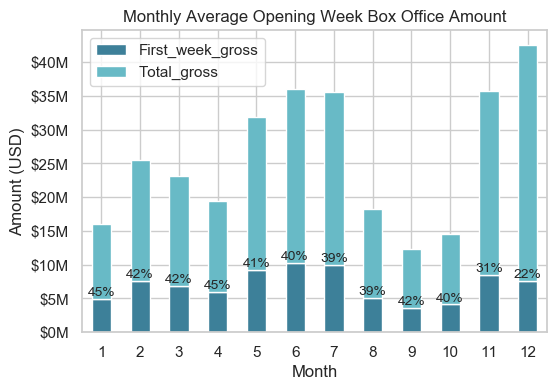

In [199]:
sns.set_style("whitegrid")
fig = plt.figure()
ax = plt.axes()
temp.plot(kind='bar', stacked=True, colormap=ListedColormap(sns.color_palette("GnBu_d", 2)), ax=ax)
ax.yaxis.set_major_formatter(formatter)
for line in range(0, temp.shape[0]):
    ax.text(x=line, y=temp['First_week_gross'].iloc[line], s=g_text[line], ha='center', va='bottom', fontsize='10')
ax.set(xlabel='Month', ylabel='Amount (USD)')
ax.set_title('Monthly Average Opening Week Box Office Amount')
plt.xticks(rotation=0)
fig.set(dpi=100)

#### 星期

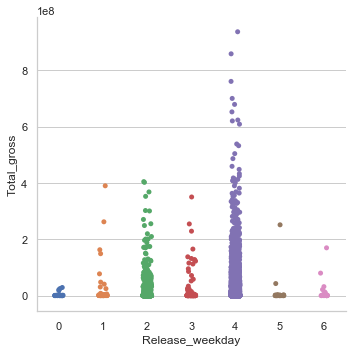

In [187]:
sns.catplot(x='Release_weekday', y='Total_gross', data=movies_df)

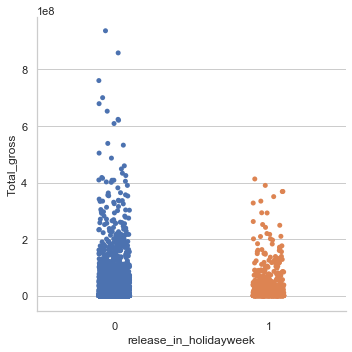

In [188]:
sns.catplot(x='release_in_holidayweek', y='Total_gross', data=movies_df)

In [189]:
movies_df.columns

Index(['tmdb_id', 'mojo_title', 'original_title', 'tagline', 'collection_id',
       'budget', 'Total_gross', 'comments_total_qty', 'sc_negative',
       'sc_neutral', 'sc_positive', 'total_sentiment_level', 'holidayweek',
       'Release_date', 'Release_year', 'Release_month', 'Release_weekday',
       'release_in_holidayweek', 'original_language', 'distributor',
       'belongs_to_collection', 'homepage', 'genres', 'Adventure', 'Fantasy',
       'Animation', 'Drama', 'Horror', 'Action', 'Comedy', 'History',
       'Thriller', 'Crime', 'Documentary', 'Science Fiction', 'Mystery',
       'Romance', 'Family', 'genre_others', 'director_id', 'top3_cast',
       '1st_cast', '2nd_cast', '3rd_cast', 'have_comments', 'runtime',
       'num_of_genres', 'num_cast', 'num_director', 'num_awardActor',
       'num_nomActor', 'num_awardDir', 'comments_qty_before_release',
       'comments_pc_before_release', 'sc2_negative', 'sc2_neutral',
       'sc2_positive', 'sentiment_level_before_release', 'sc2

In [190]:
holiday_list = movies_df[movies_df['release_in_holidayweek']==1]

In [191]:
holiday_list.groupby('holidayweek')['tmdb_id'].count()

holidayweek
Christmas                       70
Columbus Day                   138
Independence                    89
Labor Day                      162
Martin Luther King, Jr. Day    121
Memorial Day                   115
New Year                        42
Thanksgiving                    87
Veterans Day                   106
Washington's Birthday           89
Name: tmdb_id, dtype: int64

In [192]:
holiday_num = holiday_list.groupby('holidayweek')['tmdb_id'].count().sort_values(ascending=False)
holiday_num

holidayweek
Labor Day                      162
Columbus Day                   138
Martin Luther King, Jr. Day    121
Memorial Day                   115
Veterans Day                   106
Washington's Birthday           89
Independence                    89
Thanksgiving                    87
Christmas                       70
New Year                        42
Name: tmdb_id, dtype: int64

Text(0, 0.5, 'US Holiday')

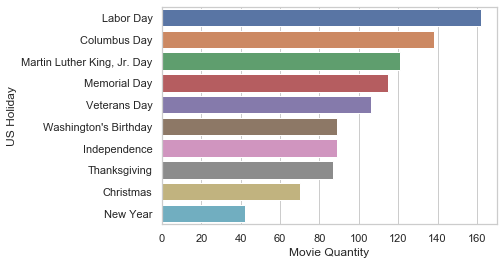

In [193]:
sns.barplot(y=holiday_num.index, x=holiday_num)
plt.xlabel('Movie Quantity')
plt.ylabel('US Holiday')

In [194]:
holiday_amount = holiday_list.groupby('holidayweek')['Total_gross'].sum().sort_values(ascending=False)
holiday_amount

holidayweek
Independence                   3.481249e+09
Christmas                      3.210930e+09
Thanksgiving                   2.768894e+09
Memorial Day                   2.314937e+09
Veterans Day                   2.013348e+09
Columbus Day                   1.553651e+09
Labor Day                      1.339106e+09
Washington's Birthday          1.231473e+09
Martin Luther King, Jr. Day    1.007150e+09
New Year                       3.292305e+08
Name: Total_gross, dtype: float64

Text(0, 0.5, 'US Holiday')

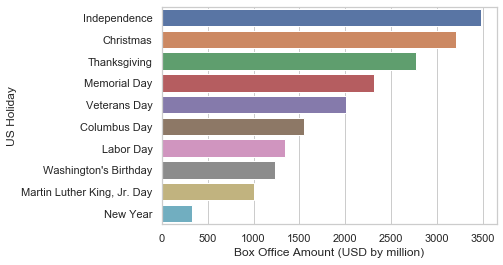

In [195]:
sns.barplot(y=holiday_amount.index, x=holiday_amount/1000000)
plt.xlabel('Box Office Amount (USD by million)')
plt.ylabel('US Holiday')

In [196]:
holiday_list.columns

Index(['tmdb_id', 'mojo_title', 'original_title', 'tagline', 'collection_id',
       'budget', 'Total_gross', 'comments_total_qty', 'sc_negative',
       'sc_neutral', 'sc_positive', 'total_sentiment_level', 'holidayweek',
       'Release_date', 'Release_year', 'Release_month', 'Release_weekday',
       'release_in_holidayweek', 'original_language', 'distributor',
       'belongs_to_collection', 'homepage', 'genres', 'Adventure', 'Fantasy',
       'Animation', 'Drama', 'Horror', 'Action', 'Comedy', 'History',
       'Thriller', 'Crime', 'Documentary', 'Science Fiction', 'Mystery',
       'Romance', 'Family', 'genre_others', 'director_id', 'top3_cast',
       '1st_cast', '2nd_cast', '3rd_cast', 'have_comments', 'runtime',
       'num_of_genres', 'num_cast', 'num_director', 'num_awardActor',
       'num_nomActor', 'num_awardDir', 'comments_qty_before_release',
       'comments_pc_before_release', 'sc2_negative', 'sc2_neutral',
       'sc2_positive', 'sentiment_level_before_release', 'sc2

In [197]:
holiday_amount2 = holiday_list.groupby('holidayweek')['First_week_gross'].sum().sort_values(ascending=False)
holiday_amount2

holidayweek
Independence                   1035839025
Memorial Day                   1006672428
Veterans Day                    766797367
Labor Day                       673606333
Christmas                       568198394
Columbus Day                    561264177
Washington's Birthday           507912513
Martin Luther King, Jr. Day     453180816
Thanksgiving                    263143962
New Year                        182807993
Name: First_week_gross, dtype: int64

Text(0, 0.5, 'US Holiday')

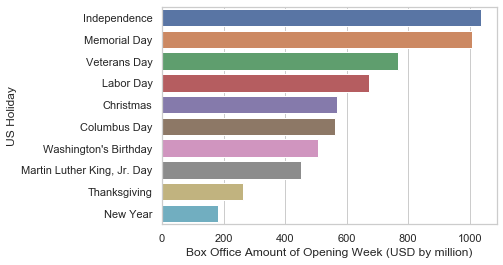

In [198]:
sns.barplot(y=holiday_amount2.index, x=holiday_amount2/1000000)
plt.xlabel('Box Office Amount of Opening Week (USD by million)')
plt.ylabel('US Holiday')